In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_excel("Industry_Portfolios.xlsx")

In [3]:
data_df = data.set_index('Date')

In [4]:
data_df = data_df/100
data_df.head()

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Date,,,,,,,,,,
200401,0.0006,-0.0107,-0.0062,0.0044,0.0453,0.0141,0.0045,0.0309,0.0192,0.0288
200402,0.0425,-0.0007,0.0195,0.0469,-0.0292,-0.0052,0.0609,0.0089,0.0207,0.0216
200403,-0.0009,-0.0115,-0.0027,-0.0013,-0.0255,-0.0207,0.0029,-0.0396,0.0113,-0.0063
200404,0.0142,0.0230,-0.0017,0.0252,-0.0491,-0.0048,-0.0270,0.0354,-0.0355,-0.0376
200405,-0.0189,-0.0164,0.0161,0.0039,0.0485,-0.0295,0.0030,-0.0042,0.0128,0.0186


In [5]:
cov_matrix = data_df.cov()
cov_matrix

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
NoDur,0.001119,0.001845,0.001410,0.001053,0.001292,0.001197,0.001017,0.000995,0.000787,0.001444
Durbl,0.001845,0.006992,0.003918,0.002702,0.003547,0.002749,0.002744,0.001682,0.001275,0.003936
Manuf,0.001410,0.003918,0.002820,0.002315,0.002462,0.001955,0.001762,0.001360,0.001144,0.002631
Enrgy,0.001053,0.002702,0.002315,0.003698,0.001927,0.001537,0.001130,0.000963,0.001403,0.001832
HiTec,0.001292,0.003547,0.002462,0.001927,0.002896,0.001871,0.001784,0.001325,0.001030,0.002386
Telcm,0.001197,0.002749,0.001955,0.001537,0.001871,0.001979,0.001417,0.001151,0.001099,0.001961
Shops,0.001017,0.002744,0.001762,0.001130,0.001784,0.001417,0.001676,0.001018,0.000669,0.001923
Hlth,0.000995,0.001682,0.001360,0.000963,0.001325,0.001151,0.001018,0.001434,0.000748,0.001486
Utils,0.000787,0.001275,0.001144,0.001403,0.001030,0.001099,0.000669,0.000748,0.001370,0.000999
Other,0.001444,0.003936,0.002631,0.001832,0.002386,0.001961,0.001923,0.001486,0.000999,0.003116


In [6]:
data_df_std = data_df.std()
data_df_return = data_df.mean()
assets = pd.concat([data_df_return, data_df_std], axis = 1)
assets.columns = ["Returns", "Volatility"]
print("Mean Return and Standard Deviation of 10 portfolio")
assets

Mean Return and Standard Deviation of 10 portfolio


,Returns,Volatility
NoDur,0.009028,0.033457
Durbl,0.007333,0.083619
Manuf,0.010128,0.053103
Enrgy,0.012312,0.060815
HiTec,0.007662,0.053812
Telcm,0.008814,0.044483
Shops,0.009163,0.040938
Hlth,0.007838,0.037872
Utils,0.009072,0.037018
Other,0.004891,0.055825


### Calculate α , ζ and δ using formula

In [7]:
e = np.asmatrix(np.ones(10, dtype = int)).T
R = np.asmatrix(assets['Returns'].values).T
V = np.matrix(cov_matrix.values)
V_invert = np.linalg.inv(V)

In [8]:
Alpha = R.T*V_invert*e
Alpha = Alpha.sum()
Alpha

13.794323869931926

In [9]:
Zeta = R.T*V_invert*R
Zeta= Zeta.sum()
Zeta

0.19640858464482358

In [10]:
Delta = e.T*V_invert*e
Delta = Delta.sum()
Delta

1373.8759735671188

In [11]:
Rmv = (Alpha / Delta)
Rmv

0.01004044334083263

### Calculate a and b using formula

**w* = a + b * Rp**

In [12]:
a = (Zeta*V_invert*e - Alpha*V_invert*R) / (Zeta*Delta - Alpha**2)

In [13]:
b = (Delta*V_invert*R - Alpha*V_invert*e) / (Zeta*Delta - Alpha**2)

### Define Rp range and calculate respective opimal portfolio weight and standard deviation

In [14]:
Rp_array = np.arange(0,0.0201,0.0001)
list_of_Rp = list(Rp_array)

In [15]:
list_of_optimal_weight = []
for Rp in list_of_Rp:
    w = a + b*Rp
    list_of_optimal_weight.append(w)

In [16]:
list_of_Variance = []
for w in list_of_optimal_weight:
    variance = w.T*V*w
    list_of_Variance.append(variance.sum())

In [17]:
list_of_std = np.sqrt(list_of_Variance)

In [18]:
#Lower Bound of the Frontier
Rp_array_bottom = list(np.arange(0,Rmv,0.0001))

list_of_optimal_weight_Bottom = []
for Rp in Rp_array_bottom:
    w = a + b*Rp
    list_of_optimal_weight_Bottom.append(w)

list_of_Std_Bottom = []
for w in list_of_optimal_weight_Bottom:
    variance = w.T*V*w
    std = np.sqrt(variance.sum())
    list_of_Std_Bottom.append(std)


### Plot Effecient Frontier

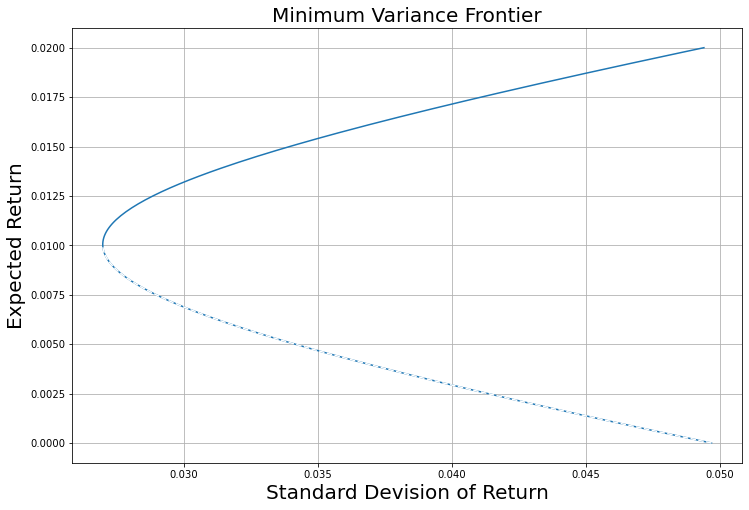

In [19]:
plt.figure(figsize = (12,8))
plt.plot(list_of_std, list_of_Rp)
plt.plot(list_of_Std_Bottom, Rp_array_bottom, "--", color = "white")# Lowerbound of the Frontier

plt.title("Minimum Variance Frontier", fontsize = 20)
plt.xlabel("Standard Devision of Return", fontsize = 20)
plt.ylabel("Expected Return", fontsize = 20)
plt.grid(True)
plt.show()

**Significant to Investor:**

The minimum variance frontier is the set of optimal portfolios (excluding riskless assets) that offer the highest expected return for a defined level of risk or the lowest risk for a given level of expected return. Portfolios that lie below the efficient frontier are sub-optimal because they do not provide enough return for the level of risk. Portfolios that cluster to the right of the efficient frontier are sub-optimal because they have a higher level of risk for the defined rate of return. Therefore, Investor should always invest in portfolio on the efficient frontier to maximize their return on investment.

### With Riskless Assets

In [20]:
#define Riskfree Rate
Rf = 0.0013

In [21]:
# define the range of Portfolio return (between risk free rate 0.13% to 2%)
R_1 = list(np.arange(Rf,0.021,0.001))

In [22]:
# calculate the respective std based on defiend Portfolio Return
std_1 = []
for r in np.arange(Rf,0.021,0.001):
    v = (r - Rf)**2 / (Zeta - 2*Alpha*Rf + Delta* (Rf**2))
    std_1.append(np.sqrt(v))

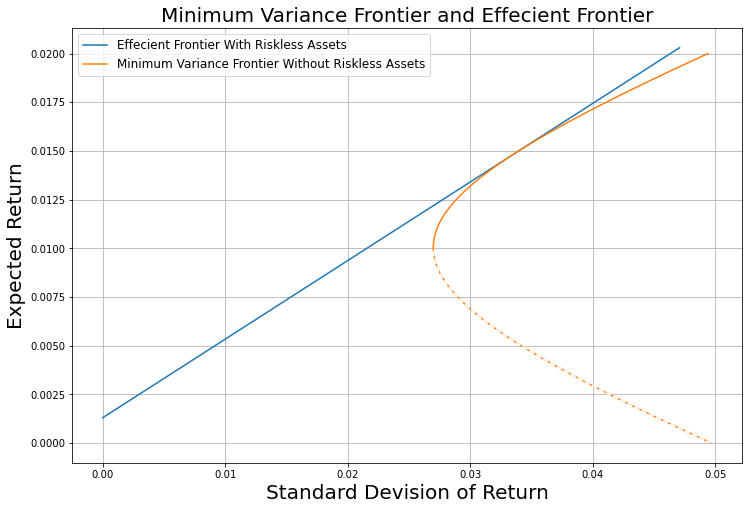

In [23]:
plt.figure(figsize = (12,8))
plt.plot(std_1, R_1, label = "Effecient Frontier With Riskless Assets") # With Riskless Assets
plt.plot(list_of_std, list_of_Rp, label = "Minimum Variance Frontier Without Riskless Assets") # Without Riskless Assets
plt.plot(list_of_Std_Bottom, Rp_array_bottom, "--", color = "white") # Lowerbound of the Frontier

plt.title("Minimum Variance Frontier and Effecient Frontier", fontsize = 20)
plt.xlabel("Standard Devision of Return", fontsize = 20)
plt.ylabel("Expected Return", fontsize = 20)
plt.grid(True)
plt.legend(fontsize = 12)
plt.show()

**Significant to Investor:**

The efficient frontier is the set of optimal portfolios (including riskless assets) that offer the highest expected return for a defined level of risk or the lowest risk for a given level of expected return. Portfolios that lie below the efficient frontier are sub-optimal because they do not provide enough return for the level of risk. Portfolios that cluster to the right of the efficient frontier are sub-optimal because they have a higher level of risk for the defined rate of return. Therefore, Investor should always invest in portfolio on the efficient frontier to maximize their return on investment.

### Tangency Portfolio

In [24]:
#Return of Tangency Portfolio
Rtg = (Alpha * Rf - Zeta) / (Delta * Rf - Alpha)
Rtg

0.014862735358446937

In [25]:
#Sharp Ratio of Tangency Porfolio
Sharp_Ratio = (Zeta - 2*Alpha*Rf + Delta*(Rf**2))**0.5
Sharp_Ratio 

0.4035655993495097

In [26]:
#Portfolio Weight of Tangency Portfolio
w_tg = a + b*Rtg
tgp = pd.DataFrame(w_tg, columns =["Tangency Portfolio Weight"])
tgp.set_index(cov_matrix.index)

,Tangency Portfolio Weight
NoDur,0.567972
Durbl,-0.214073
Manuf,0.714105
Enrgy,0.104087
HiTec,-0.363438
Telcm,-0.095463
Shops,0.991647
Hlth,0.075570
Utils,0.132643
Other,-0.913051


In [27]:
variance_tg = w_tg.T*V*w_tg
std_tg = np.sqrt(variance_tg)

In [28]:
# std_tg = -((Zeta - 2*Alpha*Rf + Delta*(Rf**2))**0.5)/(Delta*(Rf - Rmv))

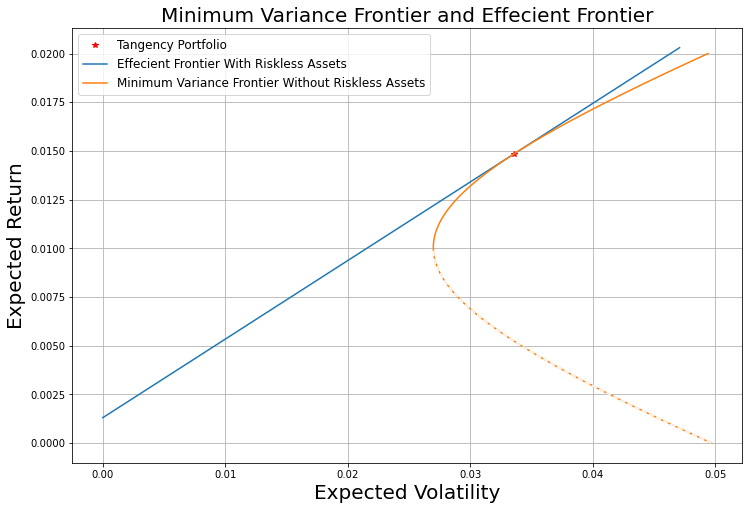

In [29]:
plt.figure(figsize=(12,8))

plt.plot(std_tg, Rtg, "*", color = "red", label = "Tangency Portfolio")
plt.plot(std_1, R_1, label = "Effecient Frontier With Riskless Assets") # With Riskless Assets
plt.plot(list_of_std, list_of_Rp, label = "Minimum Variance Frontier Without Riskless Assets") # Without Riskless Assets
plt.plot(list_of_Std_Bottom, Rp_array_bottom, "--", color = "white") # Lowerbound of the Frontier

plt.xlabel('Expected Volatility', fontsize = 20)
plt.ylabel('Expected Return', fontsize = 20)
plt.title("Minimum Variance Frontier and Effecient Frontier", fontsize = 20)
plt.legend(fontsize = 12)
plt.grid()
plt.show()

**Significant to Investor:**

The efficient frontier is the set of optimal portfolios (including riskless assets) that offer the highest expected return for a defined level of risk or the lowest risk for a given level of expected return. Portfolios that lie below the efficient frontier are sub-optimal because they do not provide enough return for the level of risk. Portfolios that cluster to the right of the efficient frontier are sub-optimal because they have a higher level of risk for the defined rate of return. Therefore, Investor should always invest in portfolio on the efficient frontier to maximize their return on investment.

### Plot some Random Portfolio 

In [30]:
def port_ret(weights):
    return np.sum(assets.Returns*weights)
def port_vol(weights):
    return np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

In [31]:
p_rets = []
p_vols = []
num_assets = len(data_df.columns) 

In [34]:
for p in range (10000):
    weights = 1/np.random.random(num_assets)
    weights /= np.sum(weights)
    
    p_rets.append(port_ret(weights))
    p_vols.append(port_vol(weights))
prets = np.array(p_rets)
pvols = np.array(p_vols)

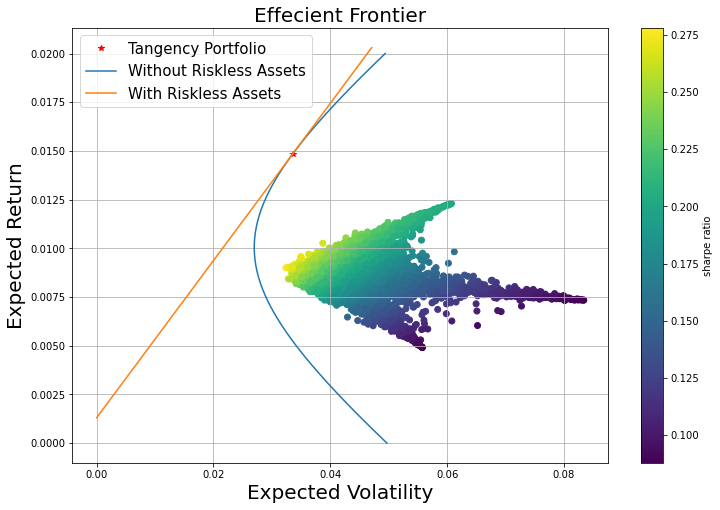

In [35]:
plt.figure(figsize=(12,8))

plt.scatter(pvols, prets, c=prets / pvols)
plt.plot(std_tg, Rtg, "*", color = "red", label = "Tangency Portfolio")
plt.plot(list_of_std, list_of_Rp, label = "Without Riskless Assets")
plt.plot(std_1, R_1, label = "With Riskless Assets")

plt.xlabel('Expected Volatility', fontsize = 20)
plt.ylabel('Expected Return', fontsize = 20)
plt.title("Effecient Frontier", fontsize = 20)
plt.colorbar(label ="sharpe ratio")
plt.legend(fontsize = 15)
plt.grid(True)
plt.show()